In [113]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [114]:
#Dataset
Dataset = pd.read_csv("insurance.csv")
Dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


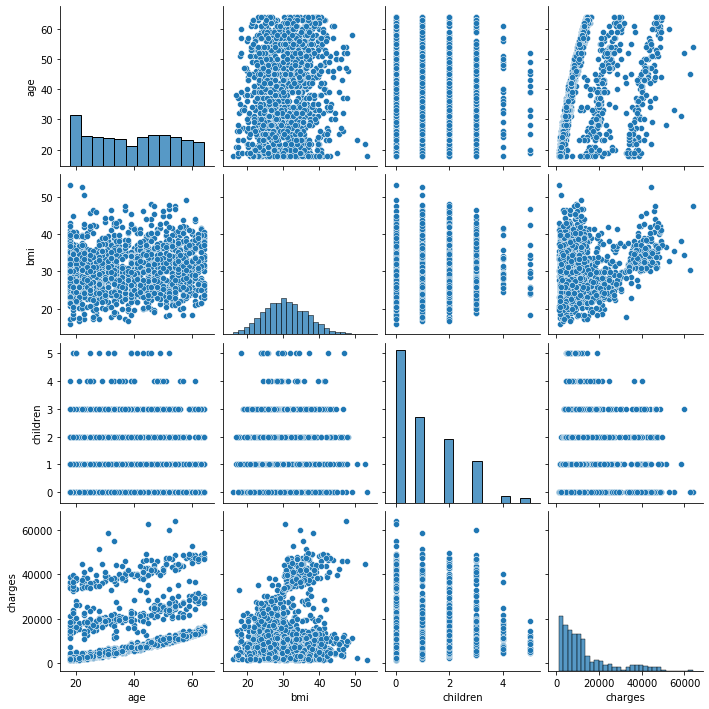

In [115]:
sns.pairplot(Dataset)

In [117]:
#Encoding Dataset
Enc_dataset = pd.DataFrame(Dataset)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Enc_dataset['sex'] = le.fit_transform(Dataset['sex'])

Enc_dataset['smoker'] = le.fit_transform(Dataset['smoker'])

Enc_dataset['region'].replace(to_replace = ['southwest','southeast','northwest','northeast'], value =[0,1,2,3], inplace=True)

Enc_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [118]:
#Splitting Dependent and Independent Variables
Enc_dataset_df = pd.DataFrame(Enc_dataset)

X = Enc_dataset_df.iloc[:, :-1]
y = Enc_dataset_df.iloc[:, -1]



In [119]:
#Splitting Training and Test Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [123]:
#Linear Regression
from sklearn.linear_model import LinearRegression

Lr = LinearRegression()

Lr.fit(X_train,y_train)

y_pred_lr = Lr.predict(X_test)


In [124]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

Rf = RandomForestRegressor(random_state = 42)

Rf.fit(X_train,y_train)
y_pred_Rf = Rf.predict(X_test)

In [125]:
#Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

Gb = GradientBoostingRegressor()

Gb.fit(X_train,y_train)
y_pred_Gb = Gb.predict(X_test)

In [139]:
#Accuracy Score
from sklearn.metrics import r2_score,mean_squared_error

reg = [y_pred_Rf, y_pred_Gb,y_pred_lr]

r2score = []

for i in range(len(reg)):
    scr = r2_score(reg[i],y_test)
    
    r2score.append(scr)

r2score

[0.8550681129993359, 0.8613428606358946, 0.7086166433516319]

In [143]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error

msscore = []
for i in range(len(reg)):
    scr = mean_squared_error(reg[i],y_test)
    
    msscore.append(scr)
    
msscore

[21197110.47834713, 18941336.013983566, 33635210.43117841]